## Assignment 1: Linear Regression

Download the dssa5201_annual_revenue_inference.csv file on Blackboard. This dataset contains actual data of number of employees, time in business and annual revenue of various businesses from across the United States. The goal is to build a multi-variate linear regression model that attempts to use number of employees and time in business to predict the annual revenue of a business. Your submission will be assessed on code completeness and details of code commentary. As a heads up, the predictive capability I anticipate will not be exceptionally accurate due to the complexity of the problem is wanting moreso than two independent variables, however, this is an excellent exercise to understand how to implement an end-to-end linear regression model.
Please rationalize your code step-by-step with insightful commentary in your code blocks, and submit a completed and annotated Jupyter notebook in the Assignment 1 item on Blackboard.

#### Imports

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train test split
from sklearn.model_selection import train_test_split

# Imputer for missing data
from sklearn.impute import SimpleImputer

# Standard scaler
    # change scale/magnitudes of data to 0 - 1; 
    # z = (x - u) / s, 
    # x = value, 
    # u = mean of training samples, 
    # s = stdev
from sklearn.preprocessing import StandardScaler

# Display Restrictions
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 

#### Read File

In [2]:
originaldf = pd.read_csv('dssa5201_annual_revenue_inference.csv')
print(originaldf.shape)
originaldf.head()

(791242, 4)


,company_record_id,estimated_number_employees,time_in_business,annual_revenue
0,4e6f6c1c-930b-401b-9d41-160b21beaf82-W3VAj2fkn...,4,48,NaN
1,7e7afb56-92da-4a95-b884-df7cc7a1ed3e-SBUho6F8i...,3,10,NaN
2,b798c1ac-7d85-43b8-b9c2-ea1a3b493d41-SBUho6F8i...,3,23,NaN
3,789afae7-138a-4a3c-80dd-1ef54651f7f2-8Mrkv62pC...,1,10,NaN
4,34593385-a7a0-45c7-9b03-a9e21202f7f2-f97BTCYPv...,30,9,NaN


#### Do initial Visualizations

Text(0, 0.5, 'Frequency')

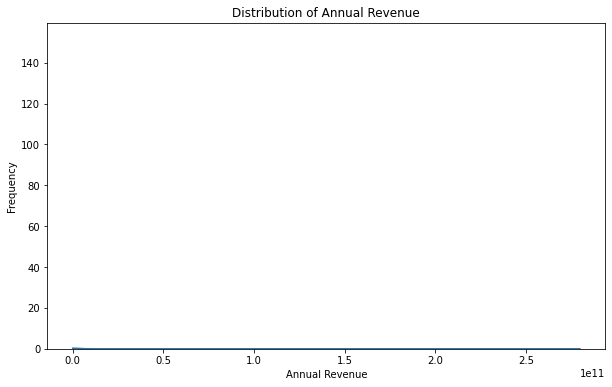

In [3]:
# Visualize the distribution of the target variable, annual_revenue

    # Randomly select 1000 rows
subsample_df = originaldf.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
    # KDE is Kernal Density Estimation
        # Provides a curve instead of bars
        # Removes the need of specifying bins for histograms
sns.histplot(subsample_df['annual_revenue'], kde=True)
plt.title('Distribution of Annual Revenue')
plt.xlabel('Annual Revenue')
plt.ylabel('Frequency')

Text(0, 0.5, 'Annual Revenue ($)')

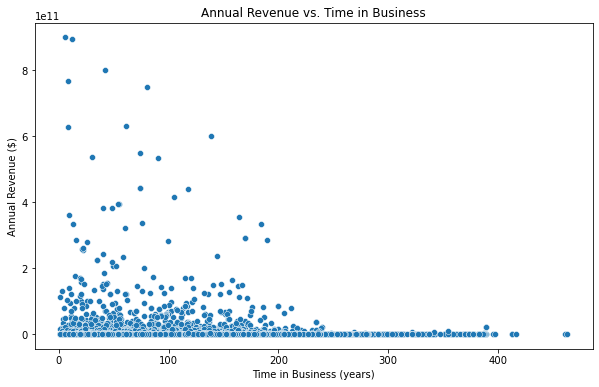

In [3]:
# Scatter plot for Annual Revenue vs. Time in Business/Estimated Number of Employees (considering these are key features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=originaldf, x='time_in_business', y='annual_revenue')
plt.title('Annual Revenue vs. Time in Business')
plt.xlabel('Time in Business (years)')
plt.ylabel('Annual Revenue ($)')

In [3]:
originaldf

,company_record_id,estimated_number_employees,time_in_business,annual_revenue
0,4e6f6c1c-930b-401b-9d41-160b21beaf82-W3VAj2fkn...,4,48,NaN
1,7e7afb56-92da-4a95-b884-df7cc7a1ed3e-SBUho6F8i...,3,10,NaN
2,b798c1ac-7d85-43b8-b9c2-ea1a3b493d41-SBUho6F8i...,3,23,NaN
3,789afae7-138a-4a3c-80dd-1ef54651f7f2-8Mrkv62pC...,1,10,NaN
4,34593385-a7a0-45c7-9b03-a9e21202f7f2-f97BTCYPv...,30,9,NaN
...,...,...,...,...
791237,86fe85d3-967f-482e-a93d-371035797ed1-SBUho6F8i...,1,7,NaN
791238,00cbcebf-23b1-4fa8-bade-287a85bff6c3-SBUho6F8i...,18,4,NaN
791239,8a3796f0-6427-4f86-adbc-98c81dd082e7-SBUho6F8i...,97,32,26185000.0
791240,9477e2be-fe0a-41a7-98bf-602e3f2da021-8Mrkv62pC...,1,32,27314000.0


#### Split the Data

In [5]:
# Initial Data Split: 80/20

# All features are in x
x = originaldf.drop('annual_revenue', axis=1)  
# Target variable is in y
Y = originaldf['annual_revenue']  

# Split the data into training and testing sets 
    # Random state means it will split the data the same way everytime
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Reset the indexes of the training and testing sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### Proccess the File

Drop Unneeded Column

In [6]:
# Drop 'company_record_id' from both the training and testing sets
    # It will not help us at all
X_train.drop('company_record_id', axis=1, inplace=True)
X_test.drop('company_record_id', axis=1, inplace=True)

Get rid of nulls, replace it with the mean of each column

In [7]:
# Replace missing values with mean
my_imputer = SimpleImputer()

# Apply the imputer to the data
X_train_imputed = pd.DataFrame(my_imputer.fit_transform(X_train))
X_test_imputed = pd.DataFrame(my_imputer.fit_transform(X_test))

    # Copy the column names from the original dataframe
X_train_imputed.columns = X_train.columns
X_test_imputed.columns = X_test.columns

In [8]:
# Check if all rows are filled
X_train_imputed.info()
X_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632993 entries, 0 to 632992
Data columns (total 2 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   estimated_number_employees  632993 non-null  float64
 1   time_in_business            632993 non-null  float64
dtypes: float64(2)
memory usage: 9.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158249 entries, 0 to 158248
Data columns (total 2 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   estimated_number_employees  158249 non-null  float64
 1   time_in_business            158249 non-null  float64
dtypes: float64(2)
memory usage: 2.4 MB


Get rid of outliers using IQR

In [9]:
# Calulcate quartiles and IQR
Q1 = X_train_imputed.quantile(0.25)
Q3 = X_train_imputed.quantile(0.75)
IQR = Q3 - Q1


# Determine Outliers
    # '~ ' = get the records that output false (not an outlier), 
    # '|' = OR
    # '.any' = it will be TRUE if either of the two conditions are met or both
X_train_imputed_no_outliers = X_train_imputed[~((X_train_imputed < (Q1 - 2.5 * IQR)) |(X_train_imputed > (Q3 + 2.5 * IQR))).any(axis=1)]
print(f'Number of records after outlier purge: {len(X_train_imputed_no_outliers)}')

X_test_imputed_no_outliers = X_test_imputed[~((X_test_imputed < (Q1 - 2.5 * IQR)) |(X_test_imputed > (Q3 + 2.5 * IQR))).any(axis=1)]
print(f'Number of records after outlier purge: {len(X_test_imputed_no_outliers)}')

Number of records after outlier purge: 545550
Number of records after outlier purge: 136250


In [10]:
# Y data needs to contain the exact rows of x
    # Inner join on index
y_train_no_outliers = y_train.loc[X_train_imputed_no_outliers.index]
y_test_no_outliers = y_test.loc[X_test_imputed_no_outliers.index]

In [11]:
# Check if it worked
X_train_imputed_no_outliers.describe()

,estimated_number_employees,time_in_business
count,545550.000000,545550.000000
mean,17.284487,22.802005
std,22.935751,18.780463
min,1.000000,0.000000
25%,3.000000,9.000000
50%,8.000000,17.000000
75%,20.000000,31.000000
max,130.000000,101.000000


Another Initial Visualization

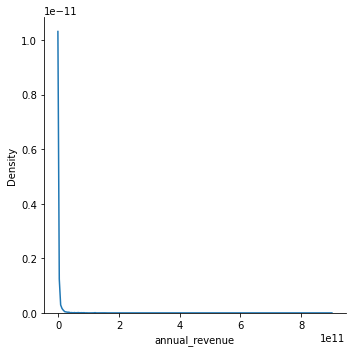

In [14]:
# Show distribution Plot
    # Looks like this as there are massive outliers in annual_revenue
sns.displot(data = Y, kind = "kde");

#### Use the new proccessed file

Combine feature and target variables

In [12]:
# Adding annual_revenue back into x train
X_train_imputed_no_outliers_annual_revenue = X_train_imputed_no_outliers
X_train_imputed_no_outliers_annual_revenue['annual_revenue'] = y_train_no_outliers

/var/folders/wm/z1f6_f9d3zb9gt8g3wkr4cl00000gn/T/ipykernel_10125/3397074263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_imputed_no_outliers_annual_revenue['annual_revenue'] = y_train_no_outliers


Plot the linear model

KeyboardInterrupt: 

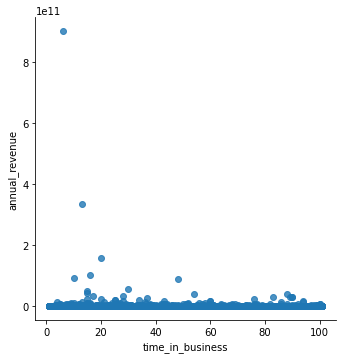

In [13]:
# Show Linear Model
lm = sns.lmplot(data = X_train_imputed_no_outliers_annual_revenue, x = 'time_in_business', y = 'annual_revenue')
lm.set(xlim = (0,130))

# Excluded it from showing the annual_revenue max since it was messing the graph up
lm.set(ylim = (0, 9000000000));


Show Correlation through a heat map

<AxesSubplot:>

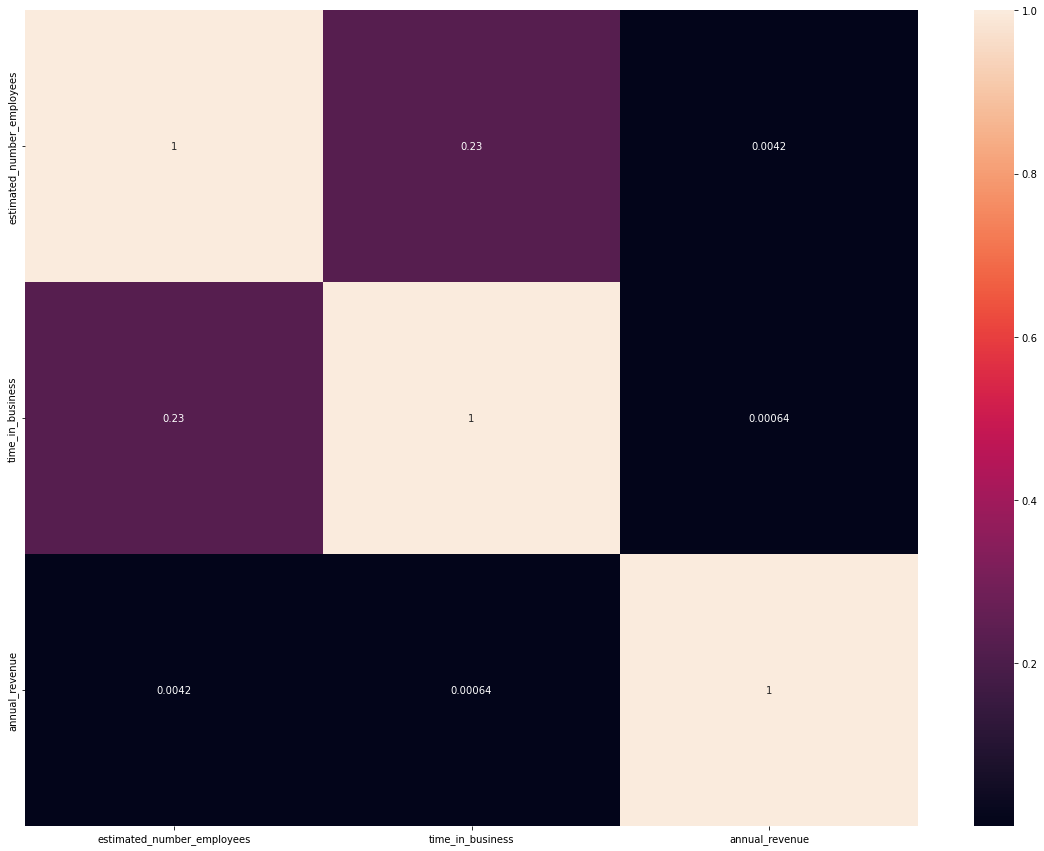

In [17]:
# Show Heat Mao
plt.figure(figsize = (20,15))
sns.heatmap(X_train_imputed_no_outliers.corr(), annot = True)

#### Perform Linear Model Calculations

In [19]:
# Scale the x training and test data frames and keep the column names
sc = StandardScaler()
 # Drop annual_revenue column that was added
X_train_imputed_no_outliers.drop('annual_revenue', axis=1, inplace=True)
x_train_scaled = pd.DataFrame(sc.fit_transform(X_train_imputed_no_outliers), columns = X_train_imputed_no_outliers.columns)
x_test_scaled = pd.DataFrame(sc.transform(X_test_imputed_no_outliers), columns = X_test_imputed_no_outliers.columns)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# Y (annual_revenue) has nulls so imputing values into just like performed for x
# Replace missing values with mean
my_imputer = SimpleImputer()

# Apply the imputer to the data
y_train_no_outliers_imputed = my_imputer.fit_transform(y_train_no_outliers.values.reshape(-1, 1))
y_test_no_outliers_imputed = my_imputer.fit_transform(y_test_no_outliers.values.reshape(-1, 1))


Linear Regression

In [21]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Provides insight into the relationships between features and the target variable.
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train_no_outliers_imputed)

# Get the predicted values
y_pred_linreg = linreg.predict(x_test_scaled)

# The R^2 value (coefficient of determination) 
    # Measures proportion of the variance in the dependent variable that is predictable from the independent variables
    # Higher R^2 value indicates a better fit
print(f'R^2 Value: {r2_score(y_test_no_outliers_imputed, y_pred_linreg)}')

# The MSE (Mean Squared Error) 
    # Measures average squared difference between the actual and predicted values
    # Lower MSE values indicate better model performance
print(f'MSE Value: {mean_squared_error(y_test_no_outliers_imputed, y_pred_linreg)}')


R^2 Value: -0.001295351790002952
MSE Value: 3.706673672458209e+16


Ridge

In [22]:
# Imports
from sklearn.linear_model import Ridge

# Ridge regression is a variant of linear regression that includes regularization to prevent overfitting.
    # Alpha controls strength of regularization
ridge = Ridge(alpha = 1.0)
ridge.fit(x_train_scaled, y_train_no_outliers_imputed)

# Get predicted values
y_pred_ridge = ridge.predict(x_test_scaled)

print(f'R^2 Value: {r2_score(y_test_no_outliers_imputed, y_pred_ridge)}')

print(f'MSE Value: {mean_squared_error(y_test_no_outliers_imputed, y_pred_ridge)}')


R^2 Value: -0.0012953506200925613
MSE Value: 3.706673668127343e+16


Random Forest

In [23]:
# Imports
from sklearn.ensemble import RandomForestRegressor

# Random forest constructs multiple decision trees during training and outputs the mean prediction of the individual trees
ran_forests = RandomForestRegressor()
ran_forests.fit(x_train_scaled, y_train_no_outliers_imputed)

# Get predicted values
y_pred_ranforests = ran_forests.predict(x_test_scaled)

print(f'R^2 Value: {r2_score(y_test_no_outliers_imputed, y_pred_ranforests)}')

print(f'MSE Value: {mean_squared_error(y_test_no_outliers_imputed, y_pred_ranforests)}')

/var/folders/wm/z1f6_f9d3zb9gt8g3wkr4cl00000gn/T/ipykernel_10125/34887358.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_forests.fit(x_train_scaled, y_train_no_outliers_imputed)
